In [3]:
# importing some vital libaries.
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [4]:
# creating the instance for tokenizer.
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# taking the sentences, converting captial letters to lower case and 
# spliting the sentences when there is '\n'.
corpus = data.lower().split('\n')

# It's gonna built 'dict', which will consist of word_index and a word
# It will map a word to a number.
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [6]:
input_sequences = [] # input can be of any length.
for line in corpus:
#     it will convert the text into sequence.
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
# I'll take the first word and append that into list
# In the next loap, I'll append 2nd word.
        input_sequences.append(n_gram_sequence)

# taking max value from the input_sequences
max_sequence_len = max([len(x) for x in input_sequences])

# padding the sequences and converting into array.
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# seperating the data into xs and labels.
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# converting the categorical to numerical data.
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Embedding is the key to text sentiment analysis in Tensorflow.
Embedding(input, embedding_dim(output_dim), input_dim=(max_length of each sentence(ex: 120 words in sentence))

In [8]:
# lets create the model.

model = Sequential([
        
    Embedding(total_words, 64, input_length=max_sequence_len-1),
    # Bidirectional means, it goes in forward and backward directions
    # Long short term memory. It consists of cell state which can be bidirectional.
    Bidirectional(LSTM(20)),
    
    
    Dense(total_words, activation='softmax'),
    
    
])

# compiling the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# training the model.
history = model.fit(xs, ys, #data
                    epochs = 500, # train it for 500 epochs.
                   verbose=1 # i want an output.
                   )

Train on 453 samples
Epoch 1/500
453/453 [==============================] - 12s 26ms/sample - loss: 5.5697 - accuracy: 0.0221
Epoch 2/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.5486 - accuracy: 0.03750s - loss: 5.5525 - accu
Epoch 3/500
453/453 [==============================] - 1s 1ms/sample - loss: 5.5036 - accuracy: 0.0419
Epoch 4/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.3627 - accuracy: 0.0486
Epoch 5/500
453/453 [==============================] - 0s 975us/sample - loss: 5.1717 - accuracy: 0.0397
Epoch 6/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.0775 - accuracy: 0.0486
Epoch 7/500
453/453 [==============================] - 1s 1ms/sample - loss: 5.0376 - accuracy: 0.0486
Epoch 8/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.0043 - accuracy: 0.0662
Epoch 9/500
453/453 [==============================] - 1s 1ms/sample - loss: 4.9695 - accuracy: 0.0508
Epoch 10/500
453/453 [==

453/453 [==============================] - 0s 1ms/sample - loss: 2.4317 - accuracy: 0.5894
Epoch 78/500
453/453 [==============================] - 0s 921us/sample - loss: 2.4071 - accuracy: 0.5762
Epoch 79/500
453/453 [==============================] - 0s 799us/sample - loss: 2.3790 - accuracy: 0.5828
Epoch 80/500
453/453 [==============================] - 0s 650us/sample - loss: 2.3427 - accuracy: 0.5828
Epoch 81/500
453/453 [==============================] - 0s 638us/sample - loss: 2.3187 - accuracy: 0.5938
Epoch 82/500
453/453 [==============================] - 0s 671us/sample - loss: 2.2977 - accuracy: 0.5916
Epoch 83/500
453/453 [==============================] - 0s 822us/sample - loss: 2.2934 - accuracy: 0.5894
Epoch 84/500
453/453 [==============================] - 0s 636us/sample - loss: 2.2552 - accuracy: 0.5938
Epoch 85/500
453/453 [==============================] - 0s 677us/sample - loss: 2.2408 - accuracy: 0.6159
Epoch 86/500
453/453 [==============================] - 0s 67

453/453 [==============================] - 0s 705us/sample - loss: 0.9748 - accuracy: 0.8675
Epoch 154/500
453/453 [==============================] - 0s 724us/sample - loss: 0.9646 - accuracy: 0.8786
Epoch 155/500
453/453 [==============================] - 0s 616us/sample - loss: 0.9511 - accuracy: 0.8830
Epoch 156/500
453/453 [==============================] - 0s 609us/sample - loss: 0.9411 - accuracy: 0.8808
Epoch 157/500
453/453 [==============================] - 0s 815us/sample - loss: 0.9304 - accuracy: 0.8830
Epoch 158/500
453/453 [==============================] - 0s 898us/sample - loss: 0.9221 - accuracy: 0.8808
Epoch 159/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.9099 - accuracy: 0.8808
Epoch 160/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.9012 - accuracy: 0.8830
Epoch 161/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.8902 - accuracy: 0.8808
Epoch 162/500
453/453 [==============================] - 

453/453 [==============================] - 0s 1ms/sample - loss: 0.4617 - accuracy: 0.9448
Epoch 229/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4576 - accuracy: 0.9404
Epoch 230/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.4529 - accuracy: 0.9448
Epoch 231/500
453/453 [==============================] - 0s 958us/sample - loss: 0.4500 - accuracy: 0.9426 - loss: 0.5331 - accura
Epoch 232/500
453/453 [==============================] - 0s 941us/sample - loss: 0.4452 - accuracy: 0.9426
Epoch 233/500
453/453 [==============================] - 0s 708us/sample - loss: 0.4408 - accuracy: 0.9470
Epoch 234/500
453/453 [==============================] - 0s 841us/sample - loss: 0.4372 - accuracy: 0.9426
Epoch 235/500
453/453 [==============================] - 0s 665us/sample - loss: 0.4334 - accuracy: 0.9448
Epoch 236/500
453/453 [==============================] - 0s 671us/sample - loss: 0.4301 - accuracy: 0.9426
Epoch 237/500
453/453 [==========

453/453 [==============================] - 0s 678us/sample - loss: 0.2669 - accuracy: 0.9492
Epoch 305/500
453/453 [==============================] - 0s 697us/sample - loss: 0.2643 - accuracy: 0.9514
Epoch 306/500
453/453 [==============================] - 0s 733us/sample - loss: 0.2637 - accuracy: 0.9470
Epoch 307/500
453/453 [==============================] - 0s 840us/sample - loss: 0.2605 - accuracy: 0.9492
Epoch 308/500
453/453 [==============================] - 0s 855us/sample - loss: 0.2599 - accuracy: 0.9492
Epoch 309/500
453/453 [==============================] - 0s 944us/sample - loss: 0.2588 - accuracy: 0.9470
Epoch 310/500
453/453 [==============================] - 0s 967us/sample - loss: 0.2559 - accuracy: 0.9536
Epoch 311/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2540 - accuracy: 0.9536
Epoch 312/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2530 - accuracy: 0.9536
Epoch 313/500
453/453 [==============================] 

453/453 [==============================] - 0s 860us/sample - loss: 0.1929 - accuracy: 0.9492
Epoch 381/500
453/453 [==============================] - 0s 814us/sample - loss: 0.1917 - accuracy: 0.9536
Epoch 382/500
453/453 [==============================] - 0s 920us/sample - loss: 0.1904 - accuracy: 0.9514
Epoch 383/500
453/453 [==============================] - 0s 965us/sample - loss: 0.1901 - accuracy: 0.9492
Epoch 384/500
453/453 [==============================] - 0s 827us/sample - loss: 0.1888 - accuracy: 0.9536
Epoch 385/500
453/453 [==============================] - 0s 875us/sample - loss: 0.1872 - accuracy: 0.9536
Epoch 386/500
453/453 [==============================] - 0s 678us/sample - loss: 0.1863 - accuracy: 0.9536
Epoch 387/500
453/453 [==============================] - 0s 698us/sample - loss: 0.1855 - accuracy: 0.9492
Epoch 388/500
453/453 [==============================] - 0s 697us/sample - loss: 0.1833 - accuracy: 0.9536
Epoch 389/500
453/453 [============================

453/453 [==============================] - 0s 871us/sample - loss: 0.1411 - accuracy: 0.9514
Epoch 457/500
453/453 [==============================] - 0s 937us/sample - loss: 0.1400 - accuracy: 0.9514
Epoch 458/500
453/453 [==============================] - 0s 972us/sample - loss: 0.1394 - accuracy: 0.9470
Epoch 459/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1395 - accuracy: 0.9470
Epoch 460/500
453/453 [==============================] - 0s 863us/sample - loss: 0.1408 - accuracy: 0.9492
Epoch 461/500
453/453 [==============================] - 0s 831us/sample - loss: 0.1390 - accuracy: 0.9492
Epoch 462/500
453/453 [==============================] - 0s 692us/sample - loss: 0.1379 - accuracy: 0.9514
Epoch 463/500
453/453 [==============================] - 0s 680us/sample - loss: 0.1371 - accuracy: 0.9514
Epoch 464/500
453/453 [==============================] - 0s 692us/sample - loss: 0.1369 - accuracy: 0.9492
Epoch 465/500
453/453 [==============================

In [16]:
# importing the matplotlib
import matplotlib.pyplot as plt

# Creating the function for plotting the graph.
def plot_graphs(history, string):
    plt.figure(figsize=(12,9)) # size of the image.
    plt.plot(history.history[string]) # plotting the data.
    plt.xlabel('epochs') # naming the x-axis
    plt.ylabel(string) # naming the y-axis
    plt.show() # return the image.

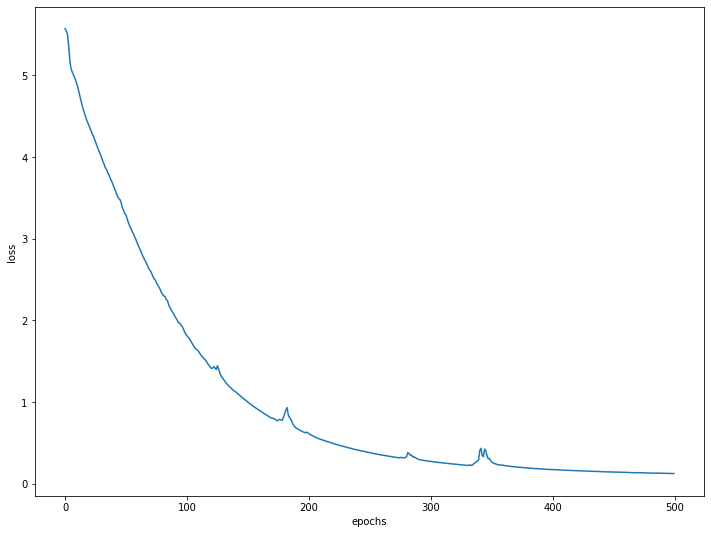

In [17]:
# passing the history obejct.
plot_graphs(history, 'loss')

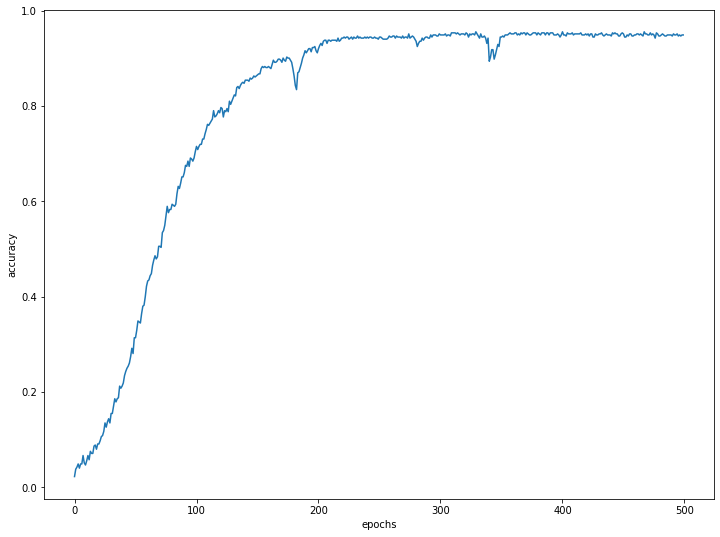

In [18]:
# plotting the accuracy.
plot_graphs(history, 'accuracy')

In [20]:
# Accuracy is sheerly good
# Time to predict the next word of the sentence.
seed_text = 'Sq went to hyderbad'
next_words = 25 # predict next 25 words.
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # padding the sequences with the maxlen and padding_type must be done before the sentences.
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0) # predicting the classes/
    output_word = '' # empty string
    
    for word, index in tokenizer.word_index.items(): # returns the dict
        if index == predicted: # index must match the predicted o/p.
            output_word = word # If the condition is true then break the statment.
            break
    # take the seed_text and add the output_word next to it.
    seed_text += " " + output_word 
print(seed_text)

Sq went to hyderbad the merry and a cask cask cask hearty cask boys i ask with peggy runctions away learn hearty hearty hearty cask hearty cask hearty cask


In [25]:
#lets try with the stack of RNN.
snd_model = Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len-1),
    # to create stack of RNN's mention return_sequence = True.
    Bidirectional(LSTM(20, return_sequences = True)),
    Bidirectional(LSTM(20)),
    
    
    Dense(total_words, activation='softmax'),
])
snd_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Model is ready to work.')

Model is ready to work.


In [26]:
# training the model.
history_snd = snd_model.fit(xs, ys, #data
                    epochs = 500, # train it for 500 epochs.
                   verbose=1 # i want an output.
                   )

Train on 453 samples
Epoch 1/500
453/453 [==============================] - 13s 30ms/sample - loss: 5.5679 - accuracy: 0.0375
Epoch 2/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.5291 - accuracy: 0.0486
Epoch 3/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.3687 - accuracy: 0.0486
Epoch 4/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.1740 - accuracy: 0.0552
Epoch 5/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.0978 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.0535 - accuracy: 0.0419
Epoch 7/500
453/453 [==============================] - 1s 1ms/sample - loss: 5.0186 - accuracy: 0.0618
Epoch 8/500
453/453 [==============================] - 1s 1ms/sample - loss: 4.9780 - accuracy: 0.0596
Epoch 9/500
453/453 [==============================] - 1s 1ms/sample - loss: 4.9307 - accuracy: 0.0552
Epoch 10/500
453/453 [============================

453/453 [==============================] - 1s 2ms/sample - loss: 2.8986 - accuracy: 0.3841
Epoch 80/500
453/453 [==============================] - 1s 2ms/sample - loss: 2.8668 - accuracy: 0.4018
Epoch 81/500
453/453 [==============================] - 1s 2ms/sample - loss: 2.8493 - accuracy: 0.4040
Epoch 82/500
453/453 [==============================] - 1s 1ms/sample - loss: 2.8466 - accuracy: 0.3951
Epoch 83/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.8231 - accuracy: 0.4018
Epoch 84/500
453/453 [==============================] - 1s 1ms/sample - loss: 2.8039 - accuracy: 0.4018
Epoch 85/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.8078 - accuracy: 0.3974
Epoch 86/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.8184 - accuracy: 0.4018
Epoch 87/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.8683 - accuracy: 0.3620
Epoch 88/500
453/453 [==============================] - 0s 1ms/sample - loss:

453/453 [==============================] - 1s 1ms/sample - loss: 1.9878 - accuracy: 0.6004
Epoch 157/500
453/453 [==============================] - 0s 1ms/sample - loss: 1.9799 - accuracy: 0.5938
Epoch 158/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.9654 - accuracy: 0.5960
Epoch 159/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.9950 - accuracy: 0.5872
Epoch 160/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.9884 - accuracy: 0.5872
Epoch 161/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.9948 - accuracy: 0.5894
Epoch 162/500
453/453 [==============================] - 1s 2ms/sample - loss: 2.0002 - accuracy: 0.5872
Epoch 163/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.9981 - accuracy: 0.5828
Epoch 164/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.9957 - accuracy: 0.5894
Epoch 165/500
453/453 [==============================] - 1s 1ms/sampl

453/453 [==============================] - 1s 1ms/sample - loss: 1.7113 - accuracy: 0.5960
Epoch 232/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.7439 - accuracy: 0.56730s - loss: 1.7435 - accuracy
Epoch 233/500
453/453 [==============================] - 0s 1ms/sample - loss: 1.6429 - accuracy: 0.6071
Epoch 234/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.7174 - accuracy: 0.5762
Epoch 235/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.6726 - accuracy: 0.6049
Epoch 236/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.5705 - accuracy: 0.6291
Epoch 237/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.5448 - accuracy: 0.64680s - loss: 1.5268 - ac
Epoch 238/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.4721 - accuracy: 0.6600
Epoch 239/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.4268 - accuracy: 0.6755
Epoch 240/500
453/4

453/453 [==============================] - ETA: 0s - loss: 0.9544 - accuracy: 0.81 - 1s 2ms/sample - loss: 0.9556 - accuracy: 0.8102
Epoch 308/500
453/453 [==============================] - 1s 3ms/sample - loss: 0.9517 - accuracy: 0.8146
Epoch 309/500
453/453 [==============================] - 1s 3ms/sample - loss: 0.9492 - accuracy: 0.8168
Epoch 310/500
453/453 [==============================] - 1s 3ms/sample - loss: 0.9459 - accuracy: 0.8168
Epoch 311/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.9605 - accuracy: 0.8079
Epoch 312/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.9990 - accuracy: 0.7991
Epoch 313/500
453/453 [==============================] - 1s 2ms/sample - loss: 1.0149 - accuracy: 0.7969
Epoch 314/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.1537 - accuracy: 0.7395
Epoch 315/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.1208 - accuracy: 0.7550
Epoch 316/500
453/453 [====

453/453 [==============================] - 1s 2ms/sample - loss: 0.6352 - accuracy: 0.8918
Epoch 384/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.6316 - accuracy: 0.8940
Epoch 385/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.6269 - accuracy: 0.8962
Epoch 386/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.6235 - accuracy: 0.8985
Epoch 387/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.6191 - accuracy: 0.9073
Epoch 388/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.6173 - accuracy: 0.9051
Epoch 389/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.6133 - accuracy: 0.9007
Epoch 390/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.6097 - accuracy: 0.9073
Epoch 391/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.6056 - accuracy: 0.9073
Epoch 392/500
453/453 [==============================] - 1s 1ms/sampl

453/453 [==============================] - 1s 2ms/sample - loss: 0.4602 - accuracy: 0.9183
Epoch 461/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4520 - accuracy: 0.9183
Epoch 462/500
453/453 [==============================] - 1s 2ms/sample - loss: 0.4409 - accuracy: 0.9249
Epoch 463/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4320 - accuracy: 0.9249
Epoch 464/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4270 - accuracy: 0.9272
Epoch 465/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4226 - accuracy: 0.9294
Epoch 466/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4189 - accuracy: 0.9338
Epoch 467/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4143 - accuracy: 0.9316
Epoch 468/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4107 - accuracy: 0.9338
Epoch 469/500
453/453 [==============================] - 1s 1ms/sampl

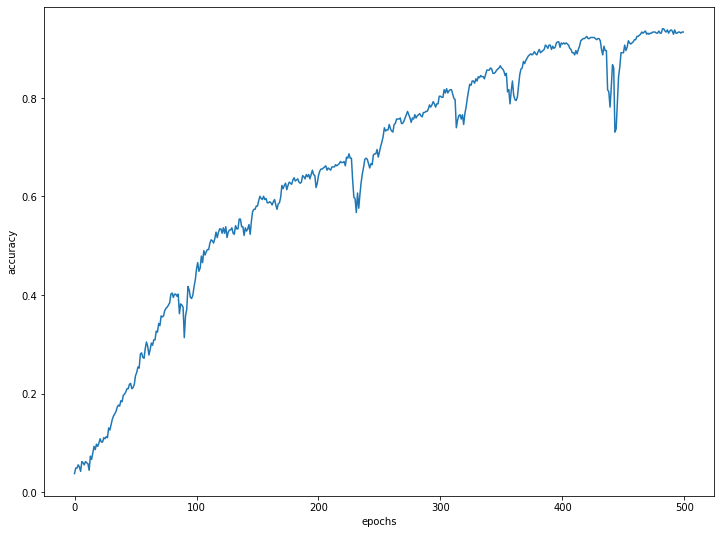

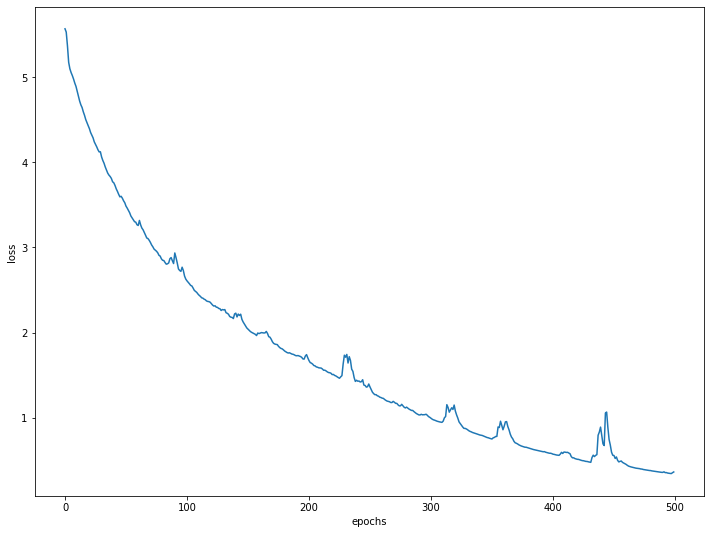

In [29]:
plot_graphs(history_snd, 'accuracy')
plot_graphs(history_snd, 'loss')

Accuracy is bit lower then the previous one.